In [294]:
# !pip install -U fashion-clip

In [295]:
import sys
import os
#sys.path.append("fashion-clip/")
from fashion_clip.fashion_clip import FashionCLIP
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [296]:
fclip = FashionCLIP('fashion-clip')

In [297]:
category = "Knits & Hoodies"
# subcategory = "Wrap Blouse"

In [298]:
import glob
# images = glob.glob("/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/"+category+"/"+subcategory+"/*.jpg")
images = glob.glob("/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/"+category+"/*.jpg")[:300]


In [299]:
len(images)

300

In [300]:
# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(images, batch_size=32)
# image_embeddings = fclip.encode_images(images, batch_size=4)

# we normalize the embeddings to unit norm (so that we can use dot product instead of cosine similarity to do comparisons)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

10it [00:04,  2.03it/s]                      


In [313]:
fit_labels = [
# "No Fit",
# "Form Fit / Bodycon",
# "Slim Fit",
# "Tailored Fit",
"Regular Fit",
"Relaxed Fit",
# "Loose Fit",
# "Oversized Fit",
# "Baggy Fit"
]

length_labels = [
"Cropped",
"Waist Length",
"Hip Length",
# "High Thigh",
# "Mid Thigh",
# "Tunic Length",
# "Above Knee",
# "Knee Length",
# "Below Knee",
# "Mid-Calf",
# "Ankle Length",
# "Full Length",
# "Floor Length"
]

sleeves_labels = [
# "No sleeves",
# "Strappy",
"Sleeveless",
# "Cap Sleeve",
"Short Sleeve",
# "Elbow Sleeve",
# "three-quarter length Sleeve",
"Long Sleeve",
# "Extra Long Sleeve"
]

neck_labels = [
# "No neck",
"Crew Neck",
"V-Neck",
# "Scoop Neck",
# "Square Neck",
# "Sweetheart Neck",
# "Boat Neck / Bateau",
"Turtleneck",
# "Mock Neck",
"Cowl Neck",
# "Halter Neck",
# "Off-the-Shoulder",
# "One-Shoulder",
# "Strapless / Bandeau",
# "Keyhole Neck",
# "Collared",
# "Plunging Neck",
# "Asymmetrical Neck",
]

fastener_labels = [
"No Buttons",
"Buttons",
# "double-button row",
"Zipper",
# "Zipper and Buttons",
# "Tie / Wrap",
# "Belt",
# "Laces",
# "buckles",
]

hood_labels = [
    "No hood",
    "hood"
]

type_labels = [
    "hoody",
    "pullover",
    "sweater",
    "sweartshirt",
    "cardigan",
    "vest",
    "knit"
]

In [302]:
hood_prompt = [f"a photo has a {k}" for k in hood_labels]
hood_embeddings = fclip.encode_text(hood_prompt, batch_size=32)
hood_embeddings = hood_embeddings/np.linalg.norm(hood_embeddings, ord=2, axis=-1, keepdims=True)
predicted_hood_distribution = hood_embeddings.dot(image_embeddings.T)
predicted_hood = [hood_labels[f] for f in np.argmax(predicted_hood_distribution, axis=0)]

Map: 100%|██████████| 2/2 [00:00<00:00, 718.88 examples/s]
1it [00:00, 80.83it/s]


In [314]:
type_prompt = [f"a photo has a {k}" for k in type_labels]
type_embeddings = fclip.encode_text(type_prompt, batch_size=32)
type_embeddings = type_embeddings/np.linalg.norm(type_embeddings, ord=2, axis=-1, keepdims=True)
predicted_type_distribution = type_embeddings.dot(image_embeddings.T)
predicted_type = [type_labels[f] for f in np.argmax(predicted_type_distribution, axis=0)]

Map: 100%|██████████| 7/7 [00:00<00:00, 1602.89 examples/s]
1it [00:00, 35.24it/s]


In [304]:
fit_prompt = [f"a photo has a {k}" for k in fit_labels]
fit_embeddings = fclip.encode_text(fit_prompt, batch_size=32)
fit_embeddings = fit_embeddings/np.linalg.norm(fit_embeddings, ord=2, axis=-1, keepdims=True)
predicted_fit_distribution = fit_embeddings.dot(image_embeddings.T)
predicted_fit = [fit_labels[f] for f in np.argmax(predicted_fit_distribution, axis=0)]

Map: 100%|██████████| 2/2 [00:00<00:00, 683.28 examples/s]
1it [00:00, 80.61it/s]


In [305]:
length_prompt = [f"a photo has a {k}" for k in length_labels]
length_embeddings = fclip.encode_text(length_prompt, batch_size=32)
length_embeddings = length_embeddings/np.linalg.norm(length_embeddings, ord=2, axis=-1, keepdims=True)
predicted_length_distribution = length_embeddings.dot(image_embeddings.T)
predicted_length = [length_labels[l] for l in np.argmax(predicted_length_distribution, axis=0)]

Map: 100%|██████████| 3/3 [00:00<00:00, 1003.66 examples/s]
1it [00:00, 71.26it/s]


In [306]:
sleeves_prompt = [f"a photo has a {k}" for k in sleeves_labels]
sleeves_embeddings = fclip.encode_text(sleeves_prompt, batch_size=32)
sleeves_embeddings = sleeves_embeddings/np.linalg.norm(sleeves_embeddings, ord=2, axis=-1, keepdims=True)
predicted_sleeves_distribution = sleeves_embeddings.dot(image_embeddings.T)
predicted_sleeves = [sleeves_labels[sl] for sl in np.argmax(predicted_sleeves_distribution, axis=0)]

Map: 100%|██████████| 3/3 [00:00<00:00, 942.05 examples/s]
1it [00:00, 70.11it/s]


In [307]:
neckline_prompt = [f"a photo has a {k}" for k in neck_labels]
neckline_embeddings = fclip.encode_text(neckline_prompt, batch_size=32)
neckline_embeddings = neckline_embeddings/np.linalg.norm(neckline_embeddings, ord=2, axis=-1, keepdims=True)
predicted_neckline_distribution = neckline_embeddings.dot(image_embeddings.T)
predicted_neckline = [neck_labels[n] for n in np.argmax(predicted_neckline_distribution, axis=0)]


Map: 100%|██████████| 4/4 [00:00<00:00, 1254.28 examples/s]
1it [00:00, 55.74it/s]


In [308]:
fastener_prompt = [f"a photo has a {k}" for k in fastener_labels]
fastener_embeddings = fclip.encode_text(fastener_prompt, batch_size=32)
fastener_embeddings = fastener_embeddings/np.linalg.norm(fastener_embeddings, ord=2, axis=-1, keepdims=True)
predicted_fastener_distribution = fastener_embeddings.dot(image_embeddings.T)
predicted_fastener = [fastener_labels[fas] for fas in np.argmax(predicted_fastener_distribution, axis=0)]

Map: 100%|██████████| 3/3 [00:00<00:00, 930.69 examples/s]
1it [00:00, 70.53it/s]


In [317]:
df = pd.DataFrame(columns=["category", "subcategory", "img", "fit", "length", "front_opening", "neck", "sleeves", "hood", "fastener", "material", "design", "embeddings"])

In [318]:
from IPython.display import display

fixed_height = 324
for ind, (img, fit, length, sleeves, neck, fastener, hood, type) in enumerate(list(zip(images, predicted_fit, predicted_length, predicted_sleeves, predicted_neckline, predicted_fastener, predicted_hood, predicted_type))):
    image = Image.open(img)
    height_percent = (fixed_height / float(image.size[1]))
    width_size = int((float(image.size[0]) * float(height_percent)))
    image = image.resize((width_size, fixed_height), Image.NEAREST)
#     print(ind, type, fit, length, sleeves, neck, fastener,hood )
    # print(ind, fit, sleeves)
    if (type=="knit"):
         df.loc[len(df)] = [category, type, img, fit, "Hip Length", "true", neck, sleeves, "false", "No Buttons", "mid knit", "", image_embeddings[ind].tolist()]
    # display(image)
    


In [319]:
df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings


0 Regular Fit Hip Length Sleeveless Turtleneck No Buttons


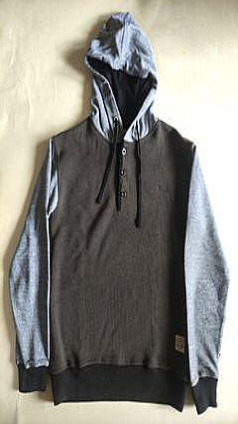

1 Regular Fit Hip Length Sleeveless Crew Neck No Buttons


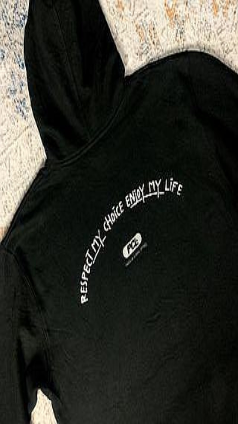

In [312]:
# Filter DataFrame for crew neck
# selected_df = df[(df["neck"] == "Crew Neck") & (df.index!=3) & (df.index!=7)& (df.index!=16) & (df.index!=25) & (df.index!=55)& (df.index!=59) & (df.index!=62) ]
# selected_df = df[(df["sleeves"] == "Short Sleeve") & (df.index!=6) & (df.index!=22)& (df.index!=23) & (df.index!=28)& (df.index!=63) & (df.index!=84)& (df.index!=101)
                #  & (df.index!=106) & (df.index!=122)& (df.index!=138) & (df.index!=141)& (df.index!=155) ]
# selected_df = df[df["fit"] == "Oversized Fit"]
# selected_df = df[(df["fastener"] == "No Buttons") & (df.index!=6) & (df.index!=8)& (df.index!=9) & (df.index!=10)& (df.index!=11) & (df.index!=12)& (df.index!=14) 
#                  & (df.index!=18)& (df.index!=23) & (df.index!=27)& (df.index!=39) & (df.index!=43)& (df.index!=63) & (df.index!=65)& (df.index!=71) & (df.index!=75)]
# selected_df = df[(df["sleeves"]=="Short Sleeve")]
selected_df = df
# Optional: limit how many images to show

fixed_height = 424
for idx, row in selected_df.iterrows():
    img_path = row["img"]  # Assumes this column has full image paths

    try:
        image = Image.open(img_path)
        
        height_percent = (fixed_height / float(image.size[1]))
        width_size = int((float(image.size[0]) * float(height_percent)))
        image = image.resize((width_size, fixed_height), Image.NEAREST)
        print(idx, row["fit"], row["length"], row["sleeves"], row["neck"], row["fastener"])
        display(image)
    except Exception as e:
        print(f"Error opening {img_path}: {e}")


In [ ]:
# df.loc[[11, 35], "sleeves"] = "Long Sleeve"
# df.loc[(df["sleeves"] == "Buttons"), "sleeves"] = "Long Sleeve"
# df.loc[(df["sleeves"] == "Short Sleeve") & (df.index!=6) & (df.index!=22)& (df.index!=23) & (df.index!=28)& (df.index!=63) & (df.index!=84)& (df.index!=101)
#                  & (df.index!=106) & (df.index!=122)& (df.index!=138) & (df.index!=141)& (df.index!=155), "sleeves"] = "Long Sleeve"

In [281]:
df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings
0,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,true,Cowl Neck,Long Sleeve,false,No Buttons,mid knit,,"[-0.017097823321819305, -0.11834444105625153, ..."
1,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Crew Neck,Long Sleeve,false,No Buttons,mid knit,,"[0.008997897617518902, -0.1373080164194107, -0..."
2,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Turtleneck,Long Sleeve,false,No Buttons,mid knit,,"[0.0011360167991369963, -0.0939825102686882, 0..."
3,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Turtleneck,Long Sleeve,false,No Buttons,mid knit,,"[0.006434939336031675, -0.06602122634649277, -..."
4,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Turtleneck,Long Sleeve,false,No Buttons,mid knit,,"[-0.006067861337214708, -0.041260793805122375,..."
5,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,V-Neck,Long Sleeve,false,No Buttons,mid knit,,"[-0.030347712337970734, -0.05870957300066948, ..."
6,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Turtleneck,Long Sleeve,false,No Buttons,mid knit,,"[0.0336478129029274, -0.10036434233188629, -0...."
7,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Cowl Neck,Sleeveless,false,No Buttons,mid knit,,"[-0.0032815414015203714, 0.018760032951831818,..."
8,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Relaxed Fit,Hip Length,true,Crew Neck,Long Sleeve,false,No Buttons,mid knit,,"[0.01688878796994686, -0.10012060403823853, -0..."
9,Knits & Hoodies,sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,true,Turtleneck,Long Sleeve,false,No Buttons,mid knit,,"[-0.0010824863566085696, -0.01795235462486744,..."


In [288]:
# df.loc[(df["neck"] == "Crew Neck") & (df.index!=3) & (df.index!=7)& (df.index!=16) & (df.index!=25) & (df.index!=55)& (df.index!=59) & (df.index!=62), "neck"] = "V-Neck"
# df.loc[df["subcategory"] == "Cropped Blazer", "length"] = "Waist Length"
# df.loc[df["neck"] == "Crew Neck", "neck"] = "V-Neck"
# df["fastener"] = "No Buttons"
# df["sleeves"] = "Long Sleeve"
# df["hood"] = "false"
# df["subcategory"] = "Sweatshirt"
# df = df.drop(index=31)
indeces = [20]
df.loc[df.index.isin(indeces), "neck"] = "Crew Neck"
# df.loc[df.index.isin(indeces), "sleeves"] = "Short Sleeve"
df.loc[df.index.isin(indeces), "length"] = "Tunic Length"
# df.loc[df.index.isin(indeces), "fit"] = "Loose Fit"
df.loc[df.index.isin(indeces), "material"] = "light knit"
# df.loc[df.index.isin(indeces), "subcategory"] = "Tunic Shirt"
df.loc[df.index.isin(indeces), "category"] = "Shirts & Blouses"
# df.loc[df.index.isin(indeces), "design"] = "Laces"
# df.loc[df.index.isin(indeces), "fastener"] = "Zipper"
df.loc[df.index.isin(indeces), "front_opening"] = "false"
# df.loc[df.index.isin(indeces), "hood"] = "true"


In [289]:
df = df[(df["subcategory"] != "hoody")& (df["subcategory"] != "pullover") & (df["subcategory"] != "sweater")  & (df["subcategory"] != "sweartshirt") & (df["subcategory"] != "vest") & (df["subcategory"] != "cardigan") ]

In [290]:
df

,category,subcategory,img,fit,length,front_opening,neck,sleeves,hood,fastener,material,design,embeddings
4,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Long Sleeve,false,No Buttons,heavy knit,,"[-0.006067861337214708, -0.041260793805122375,..."
5,Knits & Hoodies,V-neck sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,V-Neck,Long Sleeve,false,No Buttons,heavy knit,,"[-0.030347712337970734, -0.05870957300066948, ..."
6,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Mock Neck,Long Sleeve,false,Zipper,heavy knit,,"[0.0336478129029274, -0.10036434233188629, -0...."
9,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Long Sleeve,false,No Buttons,heavy knit,,"[-0.0010824863566085696, -0.01795235462486744,..."
10,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Long Sleeve,false,No Buttons,heavy knit,,"[-3.2430064038635464e-06, -0.1162087619304657,..."
11,Knits & Hoodies,V-neck sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,V-Neck,Long Sleeve,false,No Buttons,heavy knit,,"[0.02399408258497715, -0.0485239215195179, 0.0..."
13,Knits & Hoodies,V-neck sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,V-Neck,Long Sleeve,false,No Buttons,heavy knit,,"[0.0023751778062433004, 0.017529111355543137, ..."
17,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Short Sleeve,false,No Buttons,heavy knit,,"[-0.01998922787606716, -0.18855682015419006, -..."
21,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Long Sleeve,false,No Buttons,heavy knit,,"[0.02380322478711605, -0.11561844497919083, 0...."
22,Knits & Hoodies,Sweater,/home/cat/projects/CV-stuff/datasets/multilabe...,Regular Fit,Hip Length,false,Crew Neck,Long Sleeve,false,No Buttons,heavy knit,,"[0.002945980988442898, -0.19757650792598724, -..."


In [ ]:
# df = df.iloc[78:].reset_index(drop=True)


In [291]:
saved_df = pd.read_csv("fashion-clip.csv")
combined_df = pd.concat([saved_df, df])
combined_df["img"] = combined_df["img"].apply(os.path.basename)
combined_df.to_csv("fashion-clip.csv", index=False)

In [292]:
pathes = df["img"].tolist()
pathes

['/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/79d4c066-7c31-444c-b6e5-20121fefb24f.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/b26db98a-7e79-4123-88aa-3dfc469230a6.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/85e4371c-c488-4ab3-8473-cd95c5ba5829.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/f2ed2a21-1f1d-4c4f-b814-ea534d7bc397.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/c6256f9e-0ba4-406e-8143-96c174983f3a.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/341e1658-0cba-4ac2-aa39-e5b174e318fd.jpg',
 '/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear_not_in_db/Knits & Hoodies/f292247a-3e20-42e1-826e-9253

In [293]:
import shutil
# old_folder = "/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear/Shirts & Blouses"
new_folder = "/home/cat/projects/CV-stuff/datasets/multilabel_fashion_dataset/upperwear/Knits & Hoodies"
for old_path in pathes:
    filename = os.path.basename(old_path)                     # just the file name
    new_path = os.path.join(new_folder, filename)
    # print(new_path)             # build new path
    # old = os.path.join(old_folder, filename)
    shutil.move(old_path, new_path)         